<a href="https://colab.research.google.com/github/ElenaBara21/Portfolio/blob/main/Amazon_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Amazon project - Collagen

The most common types of collagen used in supplements are:
* Type I
* Type II
* Type III
* Type V
* Type X

These collagen types come in three different forms: 
* Hydrolyzed collagen (collagen peptides, collagen powder, collagen hydrolysate and hydrolyzed gelatin),
* gelatin and undenatured type II collagen (UC-II).

Collagen supplement ingredients come from a variety of sources: 
* Bovine collagen made from cows contains types I & III.
* Marine collagen made from fish contains type I & II. * Poultry collagen made from chickens contains type II and eggshell membrane collagen contains types I & V.
* We are interested in Type II, collagen is found in both marine and chicken products. People with allergies to fish or chicken should consult their doctor before taking supplements containing type II collagen.

from pandas.api.types import CategoricalDtype
## Data Description
* **Product**
* **brand**
* **Price_AED**
* **Sales**- quantity sold
* **Revenue** - quantity_sold x price_aed
* **Fees_AED**- FBA fee+ referral fee
* **Active_Seller** - number of active sellers
* **Ratings** - amazon sale rating
* **Review_Count**- total number of reviews
* **Images**- 
* **Dimensions**
* **Weight**
* **Creation_Date**
* **Category**
* **Review_velocity**-change in review count in the last 30 days
* **Buy_Box**- buy box owner,Each product page has a ‘Buy Now’ button on the right side, adjacent to the product image and description, with a hierarchal list of other buyers listed below. Sometimes, this coveted spot is based on past sales history, and sometimes it’s rotated between sellers.Amazon decides who earns the Buy Box position, but using Helium 10 tools to more effectively increase visibility and sales can help a merchant gain the buy box position. If you sell unique products under a private label, you are the most likely to have the buy box because no one else is selling the same product.
* **Size_tier**-это категория, в которую попадает товар на Amazon в зависимости от его размера и веса: Large Envelope, Standard Envelope, Standard Parcel
* **Fullfilment** - AMZ=FBA FBA stands for Fulfillment by Amazon. It is a program offered by Amazon that allows sellers to store their products in Amazon's fulfillment centers. MFN stands for Merchant Fulfilled Network. It refers to a method of fulfilling orders on Amazon where the seller handles the entire fulfillment process themselves. In this case, the seller stores the products in their own facilities and is responsible for packaging, shipping, and customer service.
* **BSR** - BSR – Best Seller Rank.Amazon tracks and publicizes its best-selling products to drive sales. Every product sold on Amazon is ranked by Amazon in at least one category, and often in several sub-categories. Ranking affects where and when products appear in a customer’s organic search. Most sellers try to rank high enough to be on the first results page of a customer search.


***Buy Box (англ. Buy Box) - это блок на странице товара на Amazon, в котором покупатель может нажать на кнопку "Купить сейчас" и сделать покупку у конкретного продавца. Он находится в правой части страницы товара, рядом с ценой и другими деталями товара. В Buy Box отображается один продавец, но Amazon может показывать разных продавцов на этом месте, основываясь на различных факторах, таких как цена, рейтинг продавца, наличие товара, и другие. Обладание Buy Box очень важно для продавцов, так как это позволяет им получать больше продаж на Amazon.



### Import libraries

In [2]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# library
import seaborn as sns
import pandas as pd
import numpy as np


In [3]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [4]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [5]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [6]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [7]:
df = pd.read_csv('Helium_10_Xray_2023-05-08.csv')

### Создаем копию  документа, чтоб не потерять данных

In [8]:
df1=df.copy()

### Смотрим первые 5 строк 

In [9]:
df1.head()

,Product Details,ASIN,URL,Image URL,Brand,Price AED,Sales,Revenue,BSR,Fees AED,...,Review Count,Images,Review velocity,Buy Box,Category,Size Tier,Fulfillment,Dimensions,Weight,Creation Date
0,"($) Nutrili Marine Collagen Shots (20) | Hair,...",B09YD7RHC2,https://www.amazon.ae/dp/B09YD7RHC2?psc=1,https://m.media-amazon.com/images/I/61asHjsoyP...,Nutrili,295.00,88.0,"25,960.00",811,52.75,...,26,11,4,nutrili,Health,Standard Parcel,FBA,4.4x3.4x4.6,1.72,4/20/2022
1,($) Swisse Beauty Collagen Glow Powder with 25...,B08NDYTG3D,https://www.amazon.ae/dp/B08NDYTG3D?psc=1,https://m.media-amazon.com/images/I/71VnTFRUH4...,Swisse,144.00,5.0,720,"23,351",29.60,...,9,3,0,Pattern MENA,Health,Standard Parcel,FBA,2.8x2.7x4.9,0.37,NaN
2,($) Snaktive Collagen Chocolate - 6x40g bars,B0B9SWK8XQ,https://www.amazon.ae/dp/B0B9SWK8XQ?psc=1,https://m.media-amazon.com/images/I/61Id91ioPE...,SNAKTIVE,60.00,4.0,240,"26,620",16.50,...,2,4,0,Le Chocolat LLC,Health,Large Envelope,FBA,1.8x5.1x2.8,0.55,NaN
3,"Youtheory Collagen Advanced with Vitamin C, 12...",B006VAZYLS,https://www.amazon.ae/dp/B006VAZYLS?psc=1,https://m.media-amazon.com/images/I/71m5dU+vK4...,Youtheory,60.37,89.0,"5,372.93",753,17.00,...,"4,676",9,88,NBL General Trading L.L.C,Health,Standard Parcel,FBA,3.1x3.0x3.6,0.42,NaN
4,Neocell Super Collagen PlUS C - 250 Tablets,B00028NGEC,https://www.amazon.ae/dp/B00028NGEC?psc=1,https://m.media-amazon.com/images/I/71TDUkdGRZ...,Neocell,135.00,542.0,"73,170.00",200,28.25,...,"18,342",14,140,Amazon,Health,Standard Parcel,AMZ,3.1x2.8x5.3,0.66,03/06/2019


#### Убираем пробелы и приводим все названия к одному формату

In [10]:
# Rename columns to lowercase with underscores instead of whitespace
new_columns = {col: col.lower().replace(' ', '_') for col in df1.columns}
df1 = df1.rename(columns=new_columns)

#### Lets check the data again

In [11]:
df1.head(2)

,product_details,asin,url,image_url,brand,price_aed,sales,revenue,bsr,fees_aed,...,review_count,images,review_velocity,buy_box,category,size_tier,fulfillment,dimensions,weight,creation_date
0,"($) Nutrili Marine Collagen Shots (20) | Hair,...",B09YD7RHC2,https://www.amazon.ae/dp/B09YD7RHC2?psc=1,https://m.media-amazon.com/images/I/61asHjsoyP...,Nutrili,295.0,88.0,"25,960.00",811,52.75,...,26,11,4,nutrili,Health,Standard Parcel,FBA,4.4x3.4x4.6,1.72,4/20/2022
1,($) Swisse Beauty Collagen Glow Powder with 25...,B08NDYTG3D,https://www.amazon.ae/dp/B08NDYTG3D?psc=1,https://m.media-amazon.com/images/I/71VnTFRUH4...,Swisse,144.0,5.0,720,"23,351",29.60,...,9,3,0,Pattern MENA,Health,Standard Parcel,FBA,2.8x2.7x4.9,0.37,NaN


### Understand the shape of the dataset

In [12]:
df1.shape

(55, 22)

* 22 columns and 55 rows

#### Проверим есть ли пропущенные данные 

In [13]:
print(df1.isnull().sum())

product_details     0
asin                0
url                 0
image_url           0
brand               0
price_aed           0
sales               4
revenue             4
bsr                 0
fees_aed            0
active_sellers_#    0
ratings             0
review_count        0
images              0
review_velocity     0
buy_box             0
category            0
size_tier           0
fulfillment         1
dimensions          0
weight              0
creation_date       8
dtype: int64


* Пропушенные данные в следующих колонках:
 creation_date=8,
 fullfilment=1
 sales=4
 revenue=4

 

In [14]:
missing_values = df1.isna().any()

# Printing the columns with missing values
print(missing_values)

product_details     False
asin                False
url                 False
image_url           False
brand               False
price_aed           False
sales                True
revenue              True
bsr                 False
fees_aed            False
active_sellers_#    False
ratings             False
review_count        False
images              False
review_velocity     False
buy_box             False
category            False
size_tier           False
fulfillment          True
dimensions          False
weight              False
creation_date        True
dtype: bool


* Sales, revenue, fulfillment, and creation date have 'n/a' values in their datasets. It is crucial to address this issue as it could potentially lead to misleading interpretations.

#### Lets treat missing data

replace n/a to NaN to avoid further mistakes in 'sales' column:

In [15]:
df1['sales'] = df1['sales'].replace('n/a', np.nan)  # Replace 'n/a' with NaN
df1['sales'] = pd.to_numeric(df1['sales'], errors='coerce')  # Convert to numeric data type


in revenue column:

In [16]:
df1['revenue'] = df1['revenue'].replace('n/a', np.nan)  # Replace 'n/a' with NaN
df1['revenue'] = pd.to_numeric(df1['revenue'], errors='coerce')  # Convert to numeric data type

in fulfillment column:

In [17]:
df1['fulfillment'] = df1['fulfillment'].replace('n/a', np.nan)  # Replace 'n/a' with NaN


in creation_date:

In [18]:
# df1['creation_date'] = df1['creation_date'].replace('n/a', np.nan)  # Replace 'n/a' with NaN
# df1['creation_date'] = pd.to_numeric(df1['creation_date'], errors='coerce')  # Convert to numeric data type

Lets treat missing data in sales column:

In [19]:
mean_sales = df1['sales'].mean()
df1['sales'] = df1['sales'].fillna(mean_sales)

In [20]:
mean_revenue = df1['revenue'].mean()
df1['revenue'] = df1['revenue'].fillna(mean_revenue)

we will drop 1 missing valuein fulfillment column

In [21]:
df1.dropna(subset=['fulfillment'], inplace=True)

#### creation_date

In [22]:
df1['creation_date'] = pd.to_datetime(df1['creation_date'], errors='coerce')


In [23]:
df1['creation_date'] = df1['creation_date'].replace('n/a', np.nan)


### we will treat missing data in the column creation_date


In [24]:
# Replace 'n/a' values with a marker, such as 'Missing'
df1['creation_date'] = df1['creation_date'].replace('n/a', 'Missing')

# Convert the 'creation_date' column to datetime type, including the 'Missing' marker
df1['creation_date'] = pd.to_datetime(df1['creation_date'], errors='coerce')

# Create a separate column to indicate missing dates
df1['is_missing_date'] = df1['creation_date'].isna()

# Extract the year from the 'creation_date' column
# year = df1['year'] = df1['creation_date'].dt.year

In [25]:
# df1.dropna(subset=['creation_date'], inplace=True)


In [26]:
print(df1.isnull().sum())

product_details     0
asin                0
url                 0
image_url           0
brand               0
price_aed           0
sales               0
revenue             0
bsr                 0
fees_aed            0
active_sellers_#    0
ratings             0
review_count        0
images              0
review_velocity     0
buy_box             0
category            0
size_tier           0
fulfillment         0
dimensions          0
weight              0
creation_date       8
is_missing_date     0
dtype: int64


In [27]:
#### For Better interpretation of this column data

In [28]:
df1.head()

,product_details,asin,url,image_url,brand,price_aed,sales,revenue,bsr,fees_aed,...,images,review_velocity,buy_box,category,size_tier,fulfillment,dimensions,weight,creation_date,is_missing_date
0,"($) Nutrili Marine Collagen Shots (20) | Hair,...",B09YD7RHC2,https://www.amazon.ae/dp/B09YD7RHC2?psc=1,https://m.media-amazon.com/images/I/61asHjsoyP...,Nutrili,295.00,88.0,444.464,811,52.75,...,11,4,nutrili,Health,Standard Parcel,FBA,4.4x3.4x4.6,1.72,2022-04-20,False
1,($) Swisse Beauty Collagen Glow Powder with 25...,B08NDYTG3D,https://www.amazon.ae/dp/B08NDYTG3D?psc=1,https://m.media-amazon.com/images/I/71VnTFRUH4...,Swisse,144.00,5.0,720.000,"23,351",29.60,...,3,0,Pattern MENA,Health,Standard Parcel,FBA,2.8x2.7x4.9,0.37,NaT,True
2,($) Snaktive Collagen Chocolate - 6x40g bars,B0B9SWK8XQ,https://www.amazon.ae/dp/B0B9SWK8XQ?psc=1,https://m.media-amazon.com/images/I/61Id91ioPE...,SNAKTIVE,60.00,4.0,240.000,"26,620",16.50,...,4,0,Le Chocolat LLC,Health,Large Envelope,FBA,1.8x5.1x2.8,0.55,NaT,True
3,"Youtheory Collagen Advanced with Vitamin C, 12...",B006VAZYLS,https://www.amazon.ae/dp/B006VAZYLS?psc=1,https://m.media-amazon.com/images/I/71m5dU+vK4...,Youtheory,60.37,89.0,444.464,753,17.00,...,9,88,NBL General Trading L.L.C,Health,Standard Parcel,FBA,3.1x3.0x3.6,0.42,NaT,True
4,Neocell Super Collagen PlUS C - 250 Tablets,B00028NGEC,https://www.amazon.ae/dp/B00028NGEC?psc=1,https://m.media-amazon.com/images/I/71TDUkdGRZ...,Neocell,135.00,542.0,444.464,200,28.25,...,14,140,Amazon,Health,Standard Parcel,AMZ,3.1x2.8x5.3,0.66,2019-03-06,False


#### Numerical and categorical data

In [29]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54 entries, 0 to 54
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   product_details   54 non-null     object        
 1   asin              54 non-null     object        
 2   url               54 non-null     object        
 3   image_url         54 non-null     object        
 4   brand             54 non-null     object        
 5   price_aed         54 non-null     float64       
 6   sales             54 non-null     float64       
 7   revenue           54 non-null     float64       
 8   bsr               54 non-null     object        
 9   fees_aed          54 non-null     float64       
 10  active_sellers_#  54 non-null     int64         
 11  ratings           54 non-null     float64       
 12  review_count      54 non-null     object        
 13  images            54 non-null     int64         
 14  review_velocity   54 non-nul

* we have 8 numerical and 14 categorical, but some values are wrong like: creation_date, dimensions, review count,revenue,asin as they are numerical


#### We need to remove the  ($) from product_details for better interpretetion

In [30]:
# df1['product_details'] = df1['product_details'].str.replace('($)', '', regex=True)
df1['product_details'] = df1['product_details'].str.replace('$', '', regex=True)

In [31]:

df1['product_details'] = df1['product_details'].str.replace('(', '').str.replace(')', '')


<ipython-input-31-859a836d1cd3>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df1['product_details'] = df1['product_details'].str.replace('(', '').str.replace(')', '')


In [32]:
df1['product_details'] = df1['product_details'].str.replace('&', 'and', regex=True)

In [33]:
df1['product_details'] = df1['product_details'].str.replace('I', '1', regex=True)

In [34]:
df1['product_details'] = df1['product_details'].str.replace('II', '2', regex=True)

In [35]:
df1.head()

,product_details,asin,url,image_url,brand,price_aed,sales,revenue,bsr,fees_aed,...,images,review_velocity,buy_box,category,size_tier,fulfillment,dimensions,weight,creation_date,is_missing_date
0,"Nutrili Marine Collagen Shots 20 | Hair, Skin...",B09YD7RHC2,https://www.amazon.ae/dp/B09YD7RHC2?psc=1,https://m.media-amazon.com/images/I/61asHjsoyP...,Nutrili,295.00,88.0,444.464,811,52.75,...,11,4,nutrili,Health,Standard Parcel,FBA,4.4x3.4x4.6,1.72,2022-04-20,False
1,Swisse Beauty Collagen Glow Powder with 2500m...,B08NDYTG3D,https://www.amazon.ae/dp/B08NDYTG3D?psc=1,https://m.media-amazon.com/images/I/71VnTFRUH4...,Swisse,144.00,5.0,720.000,"23,351",29.60,...,3,0,Pattern MENA,Health,Standard Parcel,FBA,2.8x2.7x4.9,0.37,NaT,True
2,Snaktive Collagen Chocolate - 6x40g bars,B0B9SWK8XQ,https://www.amazon.ae/dp/B0B9SWK8XQ?psc=1,https://m.media-amazon.com/images/I/61Id91ioPE...,SNAKTIVE,60.00,4.0,240.000,"26,620",16.50,...,4,0,Le Chocolat LLC,Health,Large Envelope,FBA,1.8x5.1x2.8,0.55,NaT,True
3,"Youtheory Collagen Advanced with Vitamin C, 12...",B006VAZYLS,https://www.amazon.ae/dp/B006VAZYLS?psc=1,https://m.media-amazon.com/images/I/71m5dU+vK4...,Youtheory,60.37,89.0,444.464,753,17.00,...,9,88,NBL General Trading L.L.C,Health,Standard Parcel,FBA,3.1x3.0x3.6,0.42,NaT,True
4,Neocell Super Collagen PlUS C - 250 Tablets,B00028NGEC,https://www.amazon.ae/dp/B00028NGEC?psc=1,https://m.media-amazon.com/images/I/71TDUkdGRZ...,Neocell,135.00,542.0,444.464,200,28.25,...,14,140,Amazon,Health,Standard Parcel,AMZ,3.1x2.8x5.3,0.66,2019-03-06,False


#### Statistical info


In [36]:
df1.describe().T 

,count,mean,std,min,25%,50%,75%,max
price_aed,54.0,157.195000,103.833579,26.99,85.0000,130.500,204.8925,608.99
sales,54.0,100.274510,117.747744,1.00,31.2500,69.500,117.2500,569.00
revenue,54.0,444.464000,79.518445,231.00,444.4640,444.464,444.4640,800.00
fees_aed,54.0,31.722963,16.027337,8.66,20.7500,27.600,38.8775,101.85
active_sellers_#,54.0,4.259259,2.972739,1.00,2.0000,3.000,7.0000,11.00
ratings,54.0,4.474074,0.278260,3.40,4.3250,4.500,4.6000,5.00
images,54.0,6.722222,3.450002,1.00,4.0000,6.500,9.0000,16.00
review_velocity,54.0,37.407407,87.546110,-87.00,1.0000,6.500,24.0000,497.00
weight,54.0,0.986111,0.848836,0.09,0.4425,0.620,1.3725,4.37


#### Проверим asin, url, image_url на уникальность:

In [37]:
df1.image_url.nunique()

52

In [38]:
df1.url.nunique()

52

In [39]:
df1.asin.nunique()

52

* All of the rows in these columns are unique, which is why they hold no value for us. Therefore, we can drop them

In [40]:
df1 = df1.drop(["image_url"], axis=1)

In [41]:
df1 = df1.drop(["url"], axis=1)

In [42]:
df1 = df1.drop(["asin"], axis=1)

In [43]:
df1 = df1.drop(["category"], axis=1)

In [44]:
# Assuming the dataframe is named df1 and the column is named 'Sales'
df1['sales'] = df1['sales'].replace('n/a', np.nan)

#### We now need to change the data type of the next column to numerical since the following columns are categorical: 

*   revenue
*   review count
*   bsr


In [45]:
df1['revenue'] = df1['revenue'].replace(',', '', regex=True).astype(float)


In [46]:
df1['bsr'] = df1['bsr'].str.replace(',', '',regex=True).astype(float)

In [47]:
df1['review_count'] = df1['review_count'].str.replace(',', '',regex=True).astype(float)

now lets format data_creation to dd/mm/yyyy format

In [48]:
df1['creation_date'] = pd.to_datetime(df1['creation_date'], format='%m/%d/%Y')


In [49]:
df1['creation_date'] = pd.to_datetime(df1['creation_date'], format='%m/%d/%Y', errors='coerce')



#### Lets check the format again:

In [50]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54 entries, 0 to 54
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   product_details   54 non-null     object        
 1   brand             54 non-null     object        
 2   price_aed         54 non-null     float64       
 3   sales             54 non-null     float64       
 4   revenue           54 non-null     float64       
 5   bsr               54 non-null     float64       
 6   fees_aed          54 non-null     float64       
 7   active_sellers_#  54 non-null     int64         
 8   ratings           54 non-null     float64       
 9   review_count      54 non-null     float64       
 10  images            54 non-null     int64         
 11  review_velocity   54 non-null     int64         
 12  buy_box           54 non-null     object        
 13  size_tier         54 non-null     object        
 14  fulfillment       54 non-nul

* Now we have 11 numeric and 6 object, dimensions we will modify later

In [51]:
df1.describe().T 

,count,mean,std,min,25%,50%,75%,max
price_aed,54.0,157.195000,103.833579,26.99,85.0000,130.500,204.8925,608.99
sales,54.0,100.274510,117.747744,1.00,31.2500,69.500,117.2500,569.00
revenue,54.0,444.464000,79.518445,231.00,444.4640,444.464,444.4640,800.00
bsr,54.0,6804.222222,10143.492145,200.00,1000.0000,3169.000,7433.2500,57439.00
fees_aed,54.0,31.722963,16.027337,8.66,20.7500,27.600,38.8775,101.85
active_sellers_#,54.0,4.259259,2.972739,1.00,2.0000,3.000,7.0000,11.00
ratings,54.0,4.474074,0.278260,3.40,4.3250,4.500,4.6000,5.00
review_count,54.0,6974.037037,21379.497001,1.00,27.2500,261.000,2573.5000,95283.00
images,54.0,6.722222,3.450002,1.00,4.0000,6.500,9.0000,16.00
review_velocity,54.0,37.407407,87.546110,-87.00,1.0000,6.500,24.0000,497.00


### **Feature Engineering**
Let's create a new column time_since_creation and Seasonality.
We will consider the year of data collection, 2022, as the baseline.


### time_since_creation

In [52]:
# Convert 'creation_date' to datetime type if it's not already
df1['creation_date'] = pd.to_datetime(df1['creation_date'], errors='coerce')

# Calculate the time difference between 'creation_date' and current date
current_date = pd.Timestamp.now()
df1['time_since_creation'] = (current_date - df1['creation_date']).dt.days

### Seasonality

In [53]:
# Extract the month and create binary seasonality features
df1['month'] = df1['creation_date'].dt.month

# Create binary seasonality features
df1['is_winter'] = df1['month'].isin([12, 1, 2]).astype(int)
df1['is_spring'] = df1['month'].isin([3, 4, 5]).astype(int)
df1['is_summer'] = df1['month'].isin([6, 7, 8]).astype(int)
df1['is_autumn'] = df1['month'].isin([9, 10, 11]).astype(int)


In [54]:
df1.head(2)

,product_details,brand,price_aed,sales,revenue,bsr,fees_aed,active_sellers_#,ratings,review_count,...,dimensions,weight,creation_date,is_missing_date,time_since_creation,month,is_winter,is_spring,is_summer,is_autumn
0,"Nutrili Marine Collagen Shots 20 | Hair, Skin...",Nutrili,295.0,88.0,444.464,811.0,52.75,1,4.6,26.0,...,4.4x3.4x4.6,1.72,2022-04-20,False,396.0,4.0,0,1,0,0
1,Swisse Beauty Collagen Glow Powder with 2500m...,Swisse,144.0,5.0,720.000,23351.0,29.60,1,4.9,9.0,...,2.8x2.7x4.9,0.37,NaT,True,NaN,NaN,0,0,0,0


### Exploratory Data Analysis (EDA)
#### Univariate Analysis

Lets start with 'Brand'

In [55]:
# Create a DataFrame with the 'Brand' column
brand1 = pd.DataFrame({'brand': ['Nutrili', 'Swisse', 'SNAKTIVE', 'Youtheory', 'Neocell', 'Sports Research',
                              'aitnaturals', 'Neocell', 'Auracos', 'California Gold Nutrition', 'Vital Proteins',
                              'Neocell', 'Sports Research', 'Neocell', 'Nutrili', 'Bioglan', 'Neocell',
                              'Oladole Natural', 'CH-Alpha', 'Vitabiotics', 'Lilfull', 'Doctor\'s Best',
                              'Oladole Natural', 'Vital Proteins', 'Bioglan', 'Vital Proteins', '21st Century',
                              'Sports Research', 'Neocell', 'WELLBEING NUTRITION', 'CH-Alpha',
                              'SR SPORTS RESEARCH SWEET SWEAT', 'SWEDISH NUTRA', 'Sports Research', 'FROZEN',
                              'aitnaturals', 'Garden of Life', 'HUM', 'Youtheory']})



In [56]:
brand1.nunique()

brand    23
dtype: int64

* There are 23 brands in total

In [57]:
# Perform univariate analysis
brand_counts = brand1.value_counts()
print(brand_counts)

brand                         
Neocell                           6
Sports Research                   4
Vital Proteins                    3
Nutrili                           2
Youtheory                         2
Oladole Natural                   2
aitnaturals                       2
CH-Alpha                          2
Bioglan                           2
Garden of Life                    1
HUM                               1
Lilfull                           1
FROZEN                            1
Auracos                           1
Doctor's Best                     1
SNAKTIVE                          1
SR SPORTS RESEARCH SWEET SWEAT    1
SWEDISH NUTRA                     1
California Gold Nutrition         1
Swisse                            1
Vitabiotics                       1
WELLBEING NUTRITION               1
21st Century                      1
dtype: int64


* Brand name and quantity of products it has

### Product details:

In [58]:
import pandas as pd

# Set the display options
pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.width', None)  # Remove column width limitation
pd.set_option('display.max_colwidth', -1)  # Display full text in each cell

# Print the column data
df1['product_details']=df1['product_details'].str.lower()
# to remove white space in front
df1['product_details'] = df1['product_details'].str.strip()
#change the word type to types for better itaration :
df1['product_details'] = df1['product_details'].str.replace('types', 'type', regex=True)
print(df1['product_details'])


0     nutrili marine collagen shots 20 | hair, skin and nails | 10g marine collagen, hyaluronic acid, biotin and vitamin c                                                                                    
1     swisse beauty collagen glow powder with 2500mg hydrolised collagen purest form and grape seed extract to boost skin elasticity and firmness for a younger looking skin | 20 servings | for men and women
2     snaktive collagen chocolate - 6x40g bars                                                                                                                                                                
3     youtheory collagen advanced with vitamin c, 120 count 1 bottle                                                                                                                                          
4     neocell super collagen plus c - 250 tablets                                                                                                                           

<ipython-input-58-e0db8cf10222>:6: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)  # Display full text in each cell


In [59]:
import re

# Define the patterns to match the types of collagen
marine_pattern = r"marine collagen"
hydrolysed_pattern = r"hydrolised collagen|hydrolyzed collagen"
type1_3_pattern = r"types 1 & 3|type 1 and 3"
wild_caught_pattern = r"wild caught|wild-caught collagen"
multi_pattern = r"type I, II, III, V, X|multi collagen"
korean_pattern = r"korean marine collagen|korean collagen"
pure_pattern = r"pure liquid peptide|pure peptide"
nanohydro_pattern = r"nanohydro collagen"
other_pattern = r".*"  # Matches any string

# Initialize dictionaries to store each collagen type in separate groups
collagen_groups = {
    'marine collagen': [],
    'hydrolysed collagen': [],
    'types 1 and 3 collagen': [],
    'wild caught collagen': [],
    'multi collagen': [],
    'korean marine collagen': [],
    'pure liquid peptide': [],
    'nanohydro collagen': [],
    'other': []
}



In [60]:
# Iterate over the product details and assign them to respective groups
for product in df1['product_details']:
    if re.search(marine_pattern, product, re.IGNORECASE):
        collagen_groups["marine collagen"].append(product)
    elif re.search(hydrolysed_pattern, product, re.IGNORECASE):
        collagen_groups["hydrolysed collagen"].append(product)
    elif re.search(type1_3_pattern, product, re.IGNORECASE):
        collagen_groups["types 1 and 3 collagen"].append(product)
    elif re.search(wild_caught_pattern, product, re.IGNORECASE):
        collagen_groups["wild caught collagen"].append(product)
    elif re.search(multi_pattern, product, re.IGNORECASE):
        collagen_groups["multi collagen"].append(product)
    elif re.search(korean_pattern, product, re.IGNORECASE):
        collagen_groups["korean marine collagen"].append(product)
    elif re.search(pure_pattern, product, re.IGNORECASE):
        collagen_groups["pure liquid peptide"].append(product)
    elif re.search(nanohydro_pattern, product, re.IGNORECASE):
        collagen_groups["nanohydro collagen"].append(product)
    elif re.search(other_pattern, product, re.IGNORECASE):
        collagen_groups["other"].append(product)

# Print the counts of products in each collagen group
for group, products in collagen_groups.items():
    print(f"{group}: {len(products)}")

marine collagen: 9
hydrolysed collagen: 2
types 1 and 3 collagen: 7
wild caught collagen: 0
multi collagen: 1
korean marine collagen: 0
pure liquid peptide: 1
nanohydro collagen: 0
other: 34


*** Observation: 
We have separated our data from 'product_details' on collagen types and obtained the following groups:

* Marine collagen: 9
* Hydrolysed collagen: 2
* Types 1 and 3 collagen: 7
* Multi collagen: 1
* Pure liquid peptide: 1
* Other: 34

Please note that some groups may be empty because they are already included in the marine collagen group. For example:

* Wild caught collagen: 0
* Korean marine collagen: 0
* Nanohydro collagen: 0

In [61]:
for group, products in collagen_groups.items():
    print(f"{group}:")
    for i, product in enumerate(products, 1):
        print(f"{i}. {product}")
    print()

marine collagen:
1. nutrili marine collagen shots 20 | hair, skin and nails | 10g marine collagen, hyaluronic acid, biotin and vitamin c
2. neocell neocell marine collagen 120 capsules
3. nutrili marine collagen shots 20 | hair, skin and nails | 10g marine collagen, hyaluronic acid, biotin and vitamin c
4. bioglan collagen tablets | 2500mg | hydrolysed marine collagen |hyaluronic acid | resveratrol | biotin | selenium and vitamin c | 90 tablets
5. oladole natural super collagen c marine collagen healthy bones and joint healthy glowing skin and hair strong nails 120 tablets
6. bioglan collagen effervescent | 1000mg | hydrolysed marine collagen | biotin | selenium and vitamin c | 20 berry flavoured effervescent
7. vital proteins, marine collagen, wild caught, unflavored, 7.8 oz 221 g
8. wellbeing nutrition pure korean marine collagen powder | hydrolyzed type 1 and 3 collagen protein and amino acids |supports healthy skin, hair, nails, bone and joint, non gmo, unflavored - 200g
9. collage

### Explore the unique values of the "product_details" column:

In [68]:
product_details = df1['product_details']
unique_products = product_details.unique()
print(unique_products)

['nutrili marine collagen shots 20 | hair, skin and nails | 10g marine collagen, hyaluronic acid, biotin and vitamin c'
 'swisse beauty collagen glow powder with 2500mg hydrolised collagen purest form and grape seed extract to boost skin elasticity and firmness for a younger looking skin | 20 servings | for men and women'
 'snaktive collagen chocolate - 6x40g bars'
 'youtheory collagen advanced with vitamin c, 120 count 1 bottle'
 'neocell super collagen plus c - 250 tablets'
 'sports research grass-fed, certified paleo friendly, non-gmo and gluten-free unflavored collagen peptides powder 16 oz'
 'aitnaturals super collagen with vitamin c - 6000mg - 250 tablets | ait naturals collagen peptide type 1 and 3 for hair, skin, nails and joints.'
 'neocell super collagen powder, 200 gm'
 'auracos pro collagenium high performance anti aging drink three pack combo + free pocket makeup mirror'
 'california gold nutrition, collagenup, unflavored, 7.26 oz 206 g'
 'vital proteins, collagen peptides

In [72]:
product_details = df1['product_details']
unique_products = product_details.unique()
product_count = len(unique_products)

print("Number of unique products:", product_count)
print("Unique products:")
for product in unique_products:
    print(product)

Number of unique products: 51
Unique products:
nutrili marine collagen shots 20 | hair, skin and nails | 10g marine collagen, hyaluronic acid, biotin and vitamin c
swisse beauty collagen glow powder with 2500mg hydrolised collagen purest form and grape seed extract to boost skin elasticity and firmness for a younger looking skin | 20 servings | for men and women
snaktive collagen chocolate - 6x40g bars
youtheory collagen advanced with vitamin c, 120 count 1 bottle
neocell super collagen plus c - 250 tablets
sports research grass-fed, certified paleo friendly, non-gmo and gluten-free unflavored collagen peptides powder 16 oz
aitnaturals super collagen with vitamin c - 6000mg - 250 tablets | ait naturals collagen peptide type 1 and 3 for hair, skin, nails and joints.
neocell super collagen powder, 200 gm
auracos pro collagenium high performance anti aging drink three pack combo + free pocket makeup mirror
california gold nutrition, collagenup, unflavored, 7.26 oz 206 g
vital proteins, co

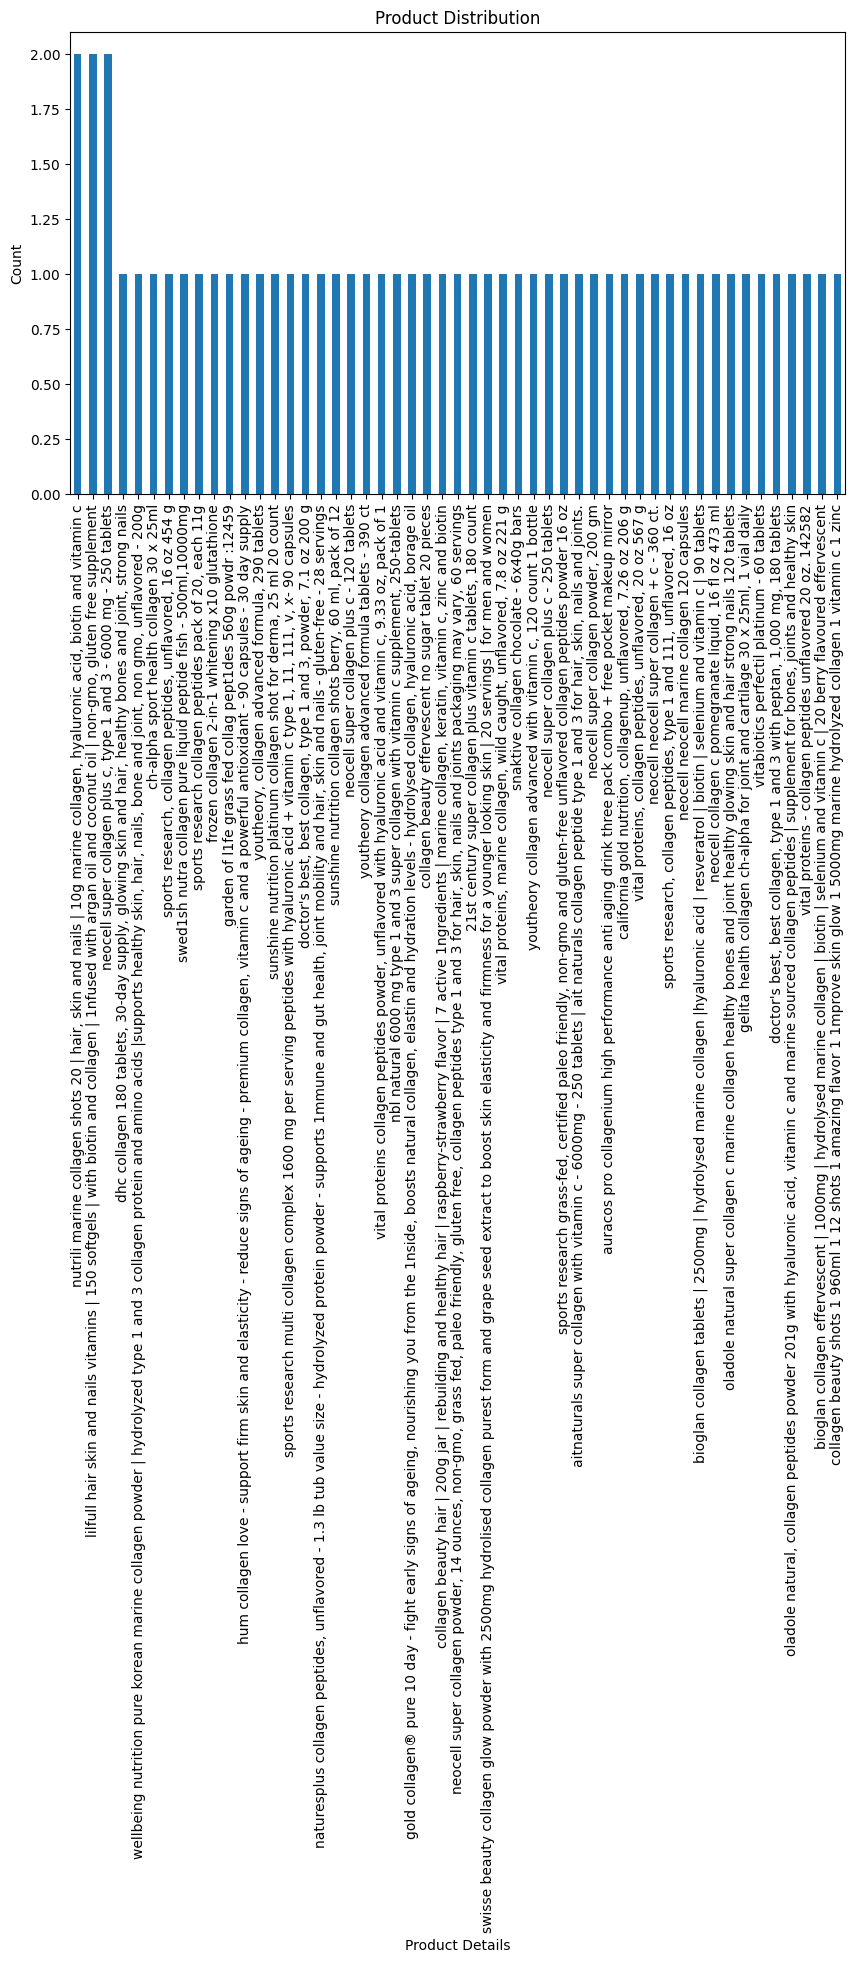

In [70]:
plt.figure(figsize=(10, 6))
product_counts.plot(kind='bar')
plt.title('Product Distribution')
plt.xlabel('Product Details')
plt.ylabel('Count')
plt.show()

In [73]:
marine_collagen = collagen_groups['marine collagen']
hydrolysed_collagen = collagen_groups['hydrolysed collagen']
type1_3_collagen = collagen_groups['types 1 and 3 collagen']
wild_caught_collagen = collagen_groups['wild caught collagen']
multi_collagen = collagen_groups['multi collagen']
korean_marine_collagen = collagen_groups['korean marine collagen']
pure_liquid_peptide = collagen_groups['pure liquid peptide']
nanohydro_collagen = collagen_groups['nanohydro collagen']
other_collagen = collagen_groups['other']

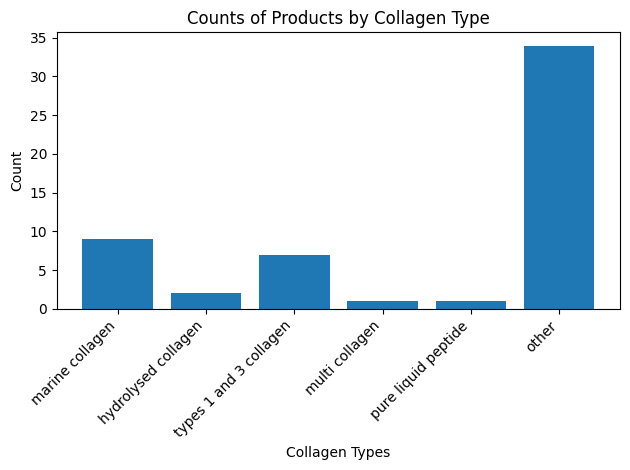

In [76]:
# Remove the groups with zero counts
collagen_types = []
collagen_counts = []

for group, count in collagen_groups.items():
    if len(count) > 0:
        collagen_types.append(group)
        collagen_counts.append(len(count))

# Plot the bar chart
plt.bar(collagen_types, collagen_counts)
plt.xlabel('Collagen Types')
plt.ylabel('Count')
plt.title('Counts of Products by Collagen Type')
plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels and align them to the right
plt.tight_layout()  # Adjust the layout to prevent label overlapping
plt.show()

### For better interpretation lets add to our table groups: marith, hydrolysed collagen, types 1 and 3, and other:

In [87]:
# Create separate columns for each collagen type
df1['marine_collagen'] = collagen_groups['marine collagen'] + [np.nan] * (len(df1) - len(collagen_groups['marine collagen']))
df1['hydrolysed_collagen'] = collagen_groups['hydrolysed collagen'] + [np.nan] * (len(df1) - len(collagen_groups['hydrolysed collagen']))
df1['types_1_3_collagen'] = collagen_groups['types 1 and 3 collagen'] + [np.nan] * (len(df1) - len(collagen_groups['types 1 and 3 collagen']))
df1['other'] = collagen_groups['other'] + [np.nan] * (len(df1) - len(collagen_groups['other']))

### **Price aed**

In [79]:
#Descriptive Statistics
print(df1['price_aed'].describe())

count    54.000000 
mean     157.195000
std      103.833579
min      26.990000 
25%      85.000000 
50%      130.500000
75%      204.892500
max      608.990000
Name: price_aed, dtype: float64


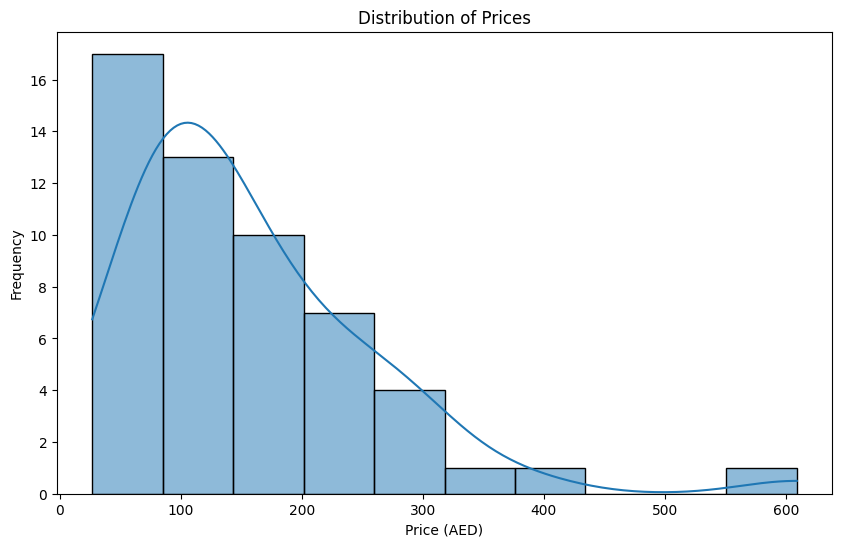

In [80]:
# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(df1['price_aed'], kde=True)
plt.xlabel('Price (AED)')
plt.ylabel('Frequency')
plt.title('Distribution of Prices')
plt.show()

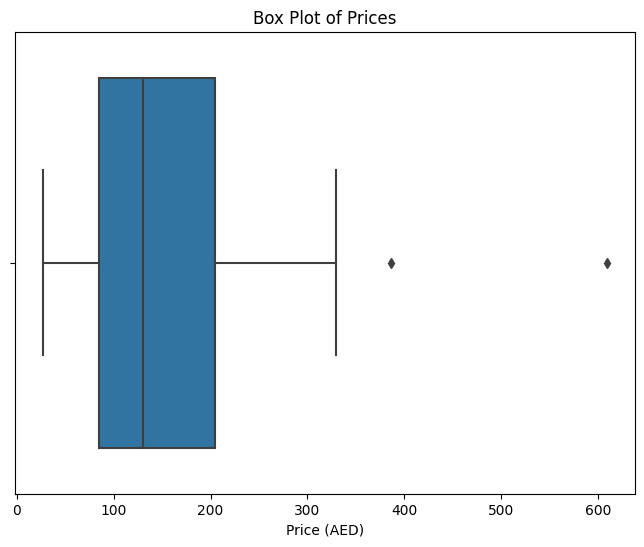

In [81]:
# Box Plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df1, x='price_aed')
plt.xlabel('Price (AED)')
plt.title('Box Plot of Prices')
plt.show()

*** Observation: we can see that we have 2 outliers one is around 380, and one is around 608. Average price is 130, min 26, max 608, so we dont need to treat outliers

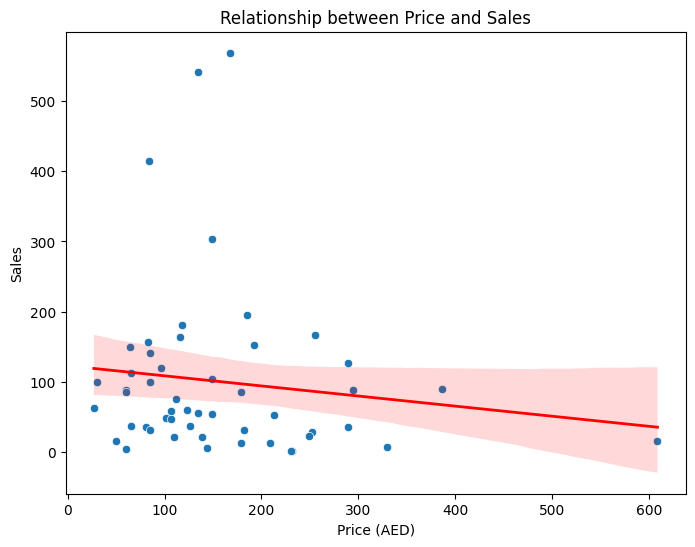

In [83]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df1, x='price_aed', y='sales')
sns.regplot(data=df1, x='price_aed', y='sales', scatter=False, color='red', line_kws={'linewidth': 2})
plt.xlabel('Price (AED)')
plt.ylabel('Sales')
plt.title('Relationship between Price and Sales')
plt.show()

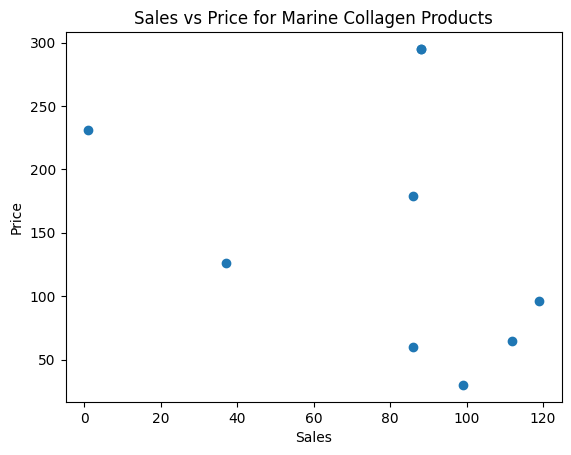

In [105]:
# Extract the 'marine collagen' products from df1
marine_collagen = df1[df1['product_details'].str.contains('marine collagen', case=False)]

# Create a scatter plot to visualize the relationship between sales and price
plt.scatter(marine_collagen['sales'], marine_collagen['price_aed'])
plt.xlabel('Sales')
plt.ylabel('Price')
plt.title('Sales vs Price for Marine Collagen Products')
plt.show()

<ipython-input-102-84cbb2d270dd>:17: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()  # Adjust spacing between labels


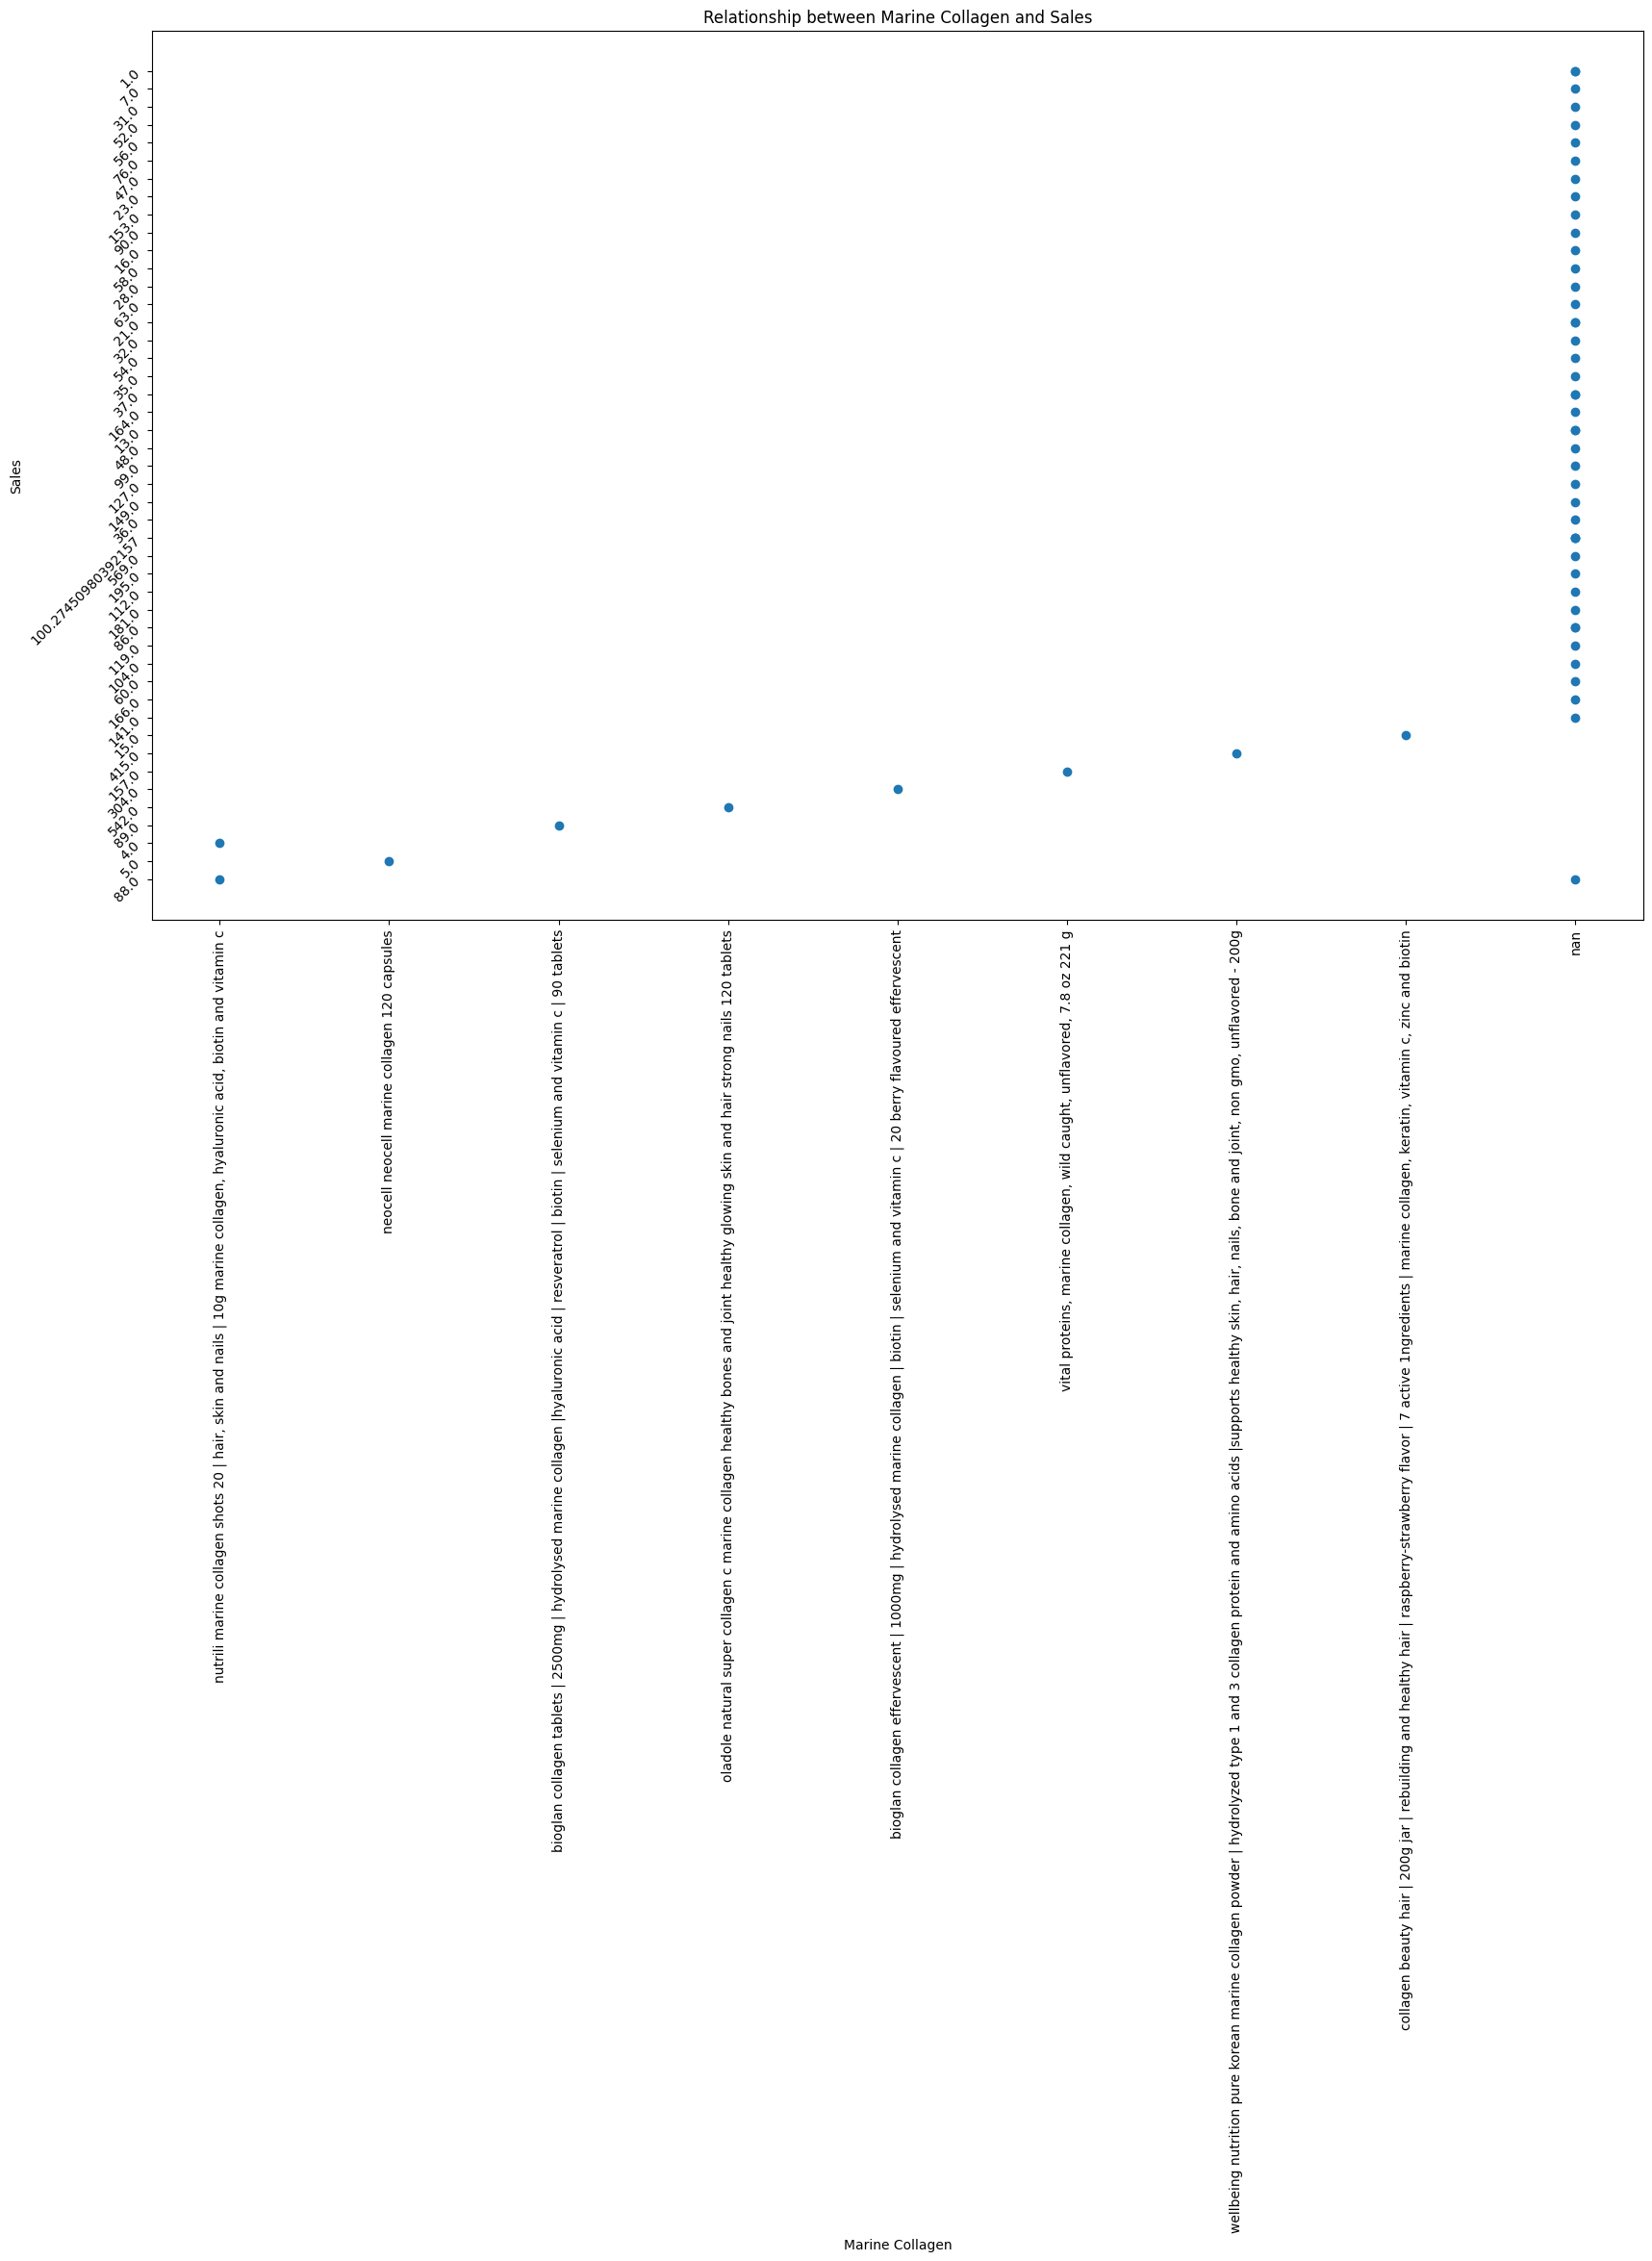

In [102]:
# Convert values to strings
marine_collagen_str = df1['marine_collagen'].astype(str)
sales_str = df1['sales'].astype(str)

# Set figure size
plt.figure(figsize=(20, 12))  # Adjust the width and height as needed

# Plotting the data
plt.scatter(marine_collagen_str, sales_str)
plt.xlabel('Marine Collagen')
plt.ylabel('Sales')
plt.title('Relationship between Marine Collagen and Sales')

# Rotate x-axis labels by 90 degrees and adjust spacing
plt.xticks(rotation=90)
plt.yticks(rotation=45)
plt.tight_layout()  # Adjust spacing between labels

plt.show()

### Lets see product_details and sales:

In [113]:

# # Plotting the graph
plt.figure(figsize=(10, 6))  # Adjust the figure size as per your preference
plt.scatter(df1['product_details'], df1['price_aed'])
plt.xlabel('Product Details')
plt.ylabel('Price (AED)')
plt.title('Price (AED) vs Product Details')

# Adjusting the x-axis labels if needed
plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees if they are too long

plt.show()

### Sales

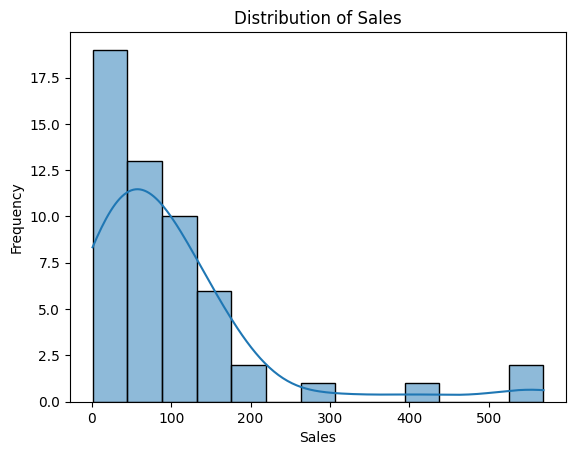

In [114]:
# Plot a histogram
sns.histplot(df1['sales'], kde=True)
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

Lets check if there are any outliers in 'sales'

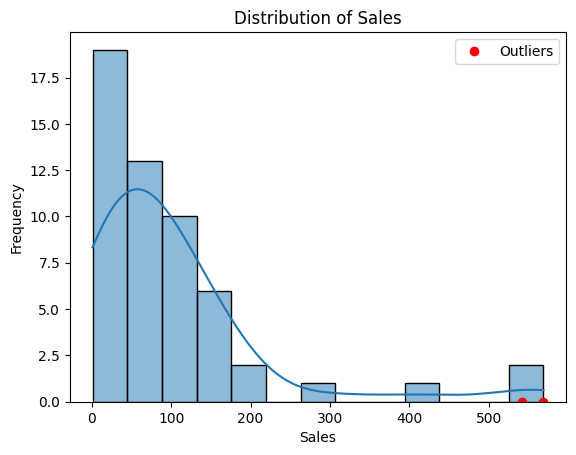

In [116]:
# Plot a histogram
sns.histplot(df1['sales'], kde=True)
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')

# Calculate the z-scores for each sales value
z_scores = (df1['sales'] - df1['sales'].mean()) / df1['sales'].std()

# Set a threshold for outlier detection (e.g., z-score > 3 or < -3)
outliers = df1[abs(z_scores) > 3]

# Highlight outliers on the graph
plt.plot(outliers['sales'], [0] * len(outliers), 'ro', label='Outliers')

plt.legend()
plt.show()

* Outliers: In this step, we calculate the z-scores for each sales value, which represent the number of standard deviations away from the mean. By setting a threshold (such as z-score > 3 or z-score < -3), we can identify outliers. The code will print out the rows of the DataFrame where the sales values are considered outliers.  the outliers will be visually represented as red circles. 

In [117]:
revenue_stats = df1['revenue'].describe()
print(revenue_stats)


count    54.000000 
mean     444.464000
std      79.518445 
min      231.000000
25%      444.464000
50%      444.464000
75%      444.464000
max      800.000000
Name: revenue, dtype: float64


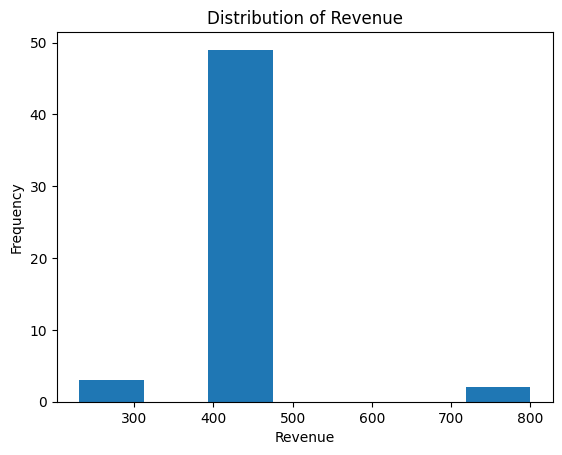

In [118]:
plt.hist(df1['revenue'], bins='auto')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.title('Distribution of Revenue')
plt.show()

*** Observation: Overall, this code generates a histogram that represents the distribution of revenue values in your dataset. The x-axis displays the revenue values, and the y-axis represents the frequency of occurrence of those values. 

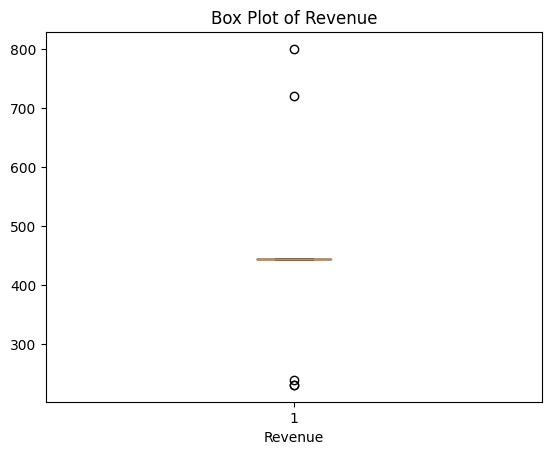

In [119]:
plt.boxplot(df1['revenue'])
plt.xlabel('Revenue')
plt.title('Box Plot of Revenue')
plt.show()

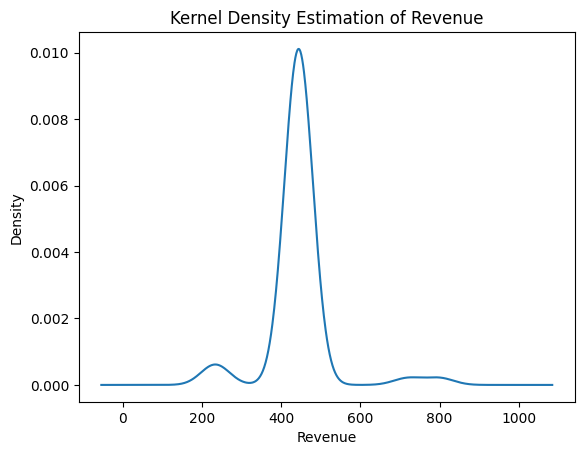

In [120]:
df1['revenue'].plot.kde()
plt.xlabel('Revenue')
plt.ylabel('Density')
plt.title('Kernel Density Estimation of Revenue')
plt.show()
